<a href="https://colab.research.google.com/github/acealrawi/NLP/blob/main/roberta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 15.4 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset

dataset = load_dataset("saattrupdan/womens-clothing-ecommerce-reviews")




Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/20641 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating val split:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [3]:
#converting it into pandas
dataset.set_format(type="pandas")
df=dataset["train"][:]
df.head()


,review_text,age,rating,positive_feedback_count,division_name,department_name,class_name,recommended_ind
0,I loved this shirt until the first time i wash...,39,1,0,General,Tops,Knits,0
1,"This sweater was unflattering me, very boxy an...",44,3,0,General,Tops,Sweaters,0
2,I fell in love with these bottoms at first sit...,41,5,2,General,Bottoms,Pants,1
3,I love the dress! i purchased this dress to w...,34,5,0,General,Dresses,Dresses,1
4,I fell in love with this dress when i saw it o...,46,5,0,General Petite,Dresses,Dresses,1


In [4]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon (required for SentimentIntensityAnalyzer)
nltk.download('vader_lexicon')

# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [5]:
!pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 94.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 28.7 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.18.0
    Uninstalling huggingface-hub-0.18.0:
      Successfully uninstalled huggingface-hub-0.18.0


In [6]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-xlm-roberta-base-sentiment-multilingual")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-xlm-roberta-base-sentiment-multilingual")

(…)ngual/resolve/main/tokenizer_config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

(…)ual/resolve/main/special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

(…)nt-multilingual/resolve/main/config.json:   0%|          | 0.00/982 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

In [7]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="cardiffnlp/twitter-xlm-roberta-base-sentiment-multilingual")

In [8]:
example =df['review_text'][3]
print(example)

I love the dress!  i purchased this dress to wear on my honeymoon to paris.  it made me feel like a princess walking around the gardens of versalles while wearing it!


In [9]:
pip install nltk

In [10]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon (required for SentimentIntensityAnalyzer)
nltk.download('vader_lexicon')

# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
print(example)
sia.polarity_scores(example)

I love the dress!  i purchased this dress to wear on my honeymoon to paris.  it made me feel like a princess walking around the gardens of versalles while wearing it!


{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.8065}

In [55]:
import numpy as np
from scipy.special import softmax
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}
print(scores_dict)


{'roberta_neg': 0.009624287, 'roberta_neu': 0.010288685, 'roberta_pos': 0.98008704}


In [56]:
def polarity_scores_bert(example):
    # Encode the input text
    encoded_text = tokenizer(example, return_tensors='pt')

    # Make predictions using the model
    output = model(**encoded_text)

    # Extract the scores
    scores = output.logits[0].detach().numpy()

    # Apply softmax to get probabilities
    scores = softmax(scores)

    # Create a dictionary of scores
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }

    return scores_dict

In [14]:
from tqdm.notebook import tqdm

res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['review_text']
    myid = row.iloc[0]  # Access the ID value by positional index
    roberta_result = polarity_scores_bert(text)
    result = {**roberta_result }
    res[myid] = result

  0%|          | 0/20641 [00:00<?, ?it/s]

In [57]:
roberta_result

{'bert_neg': 0.038600683, 'bert_neu': 0.047191296, 'bert_pos': 0.914208}

In [58]:
import pandas as pd
pd.DataFrame(res).T

,bert_neg,bert_neu,bert_pos
I loved this shirt until the first time i washed it. it shrunk so much it became unwearable. when i returned it the salesperson said she had also bought this shirt and the same thing happened.,0.467321,0.293363,0.239316
"This sweater was unflattering me, very boxy and did not fall on me like the model. soft fabric and looks nice off, however this one went back.",0.796300,0.107041,0.096658
"I fell in love with these bottoms at first site. i was a little worried they would not work for me because i'm a curvy size 12/14, but to my surprise they look great! i tried on the large as that is what i usually wear at retailer, but i was able to size down to a medium - which was great cause it minmized some of the fullness for me. they are light and breezy and will be the perfect alternative from shorts - which i hate. they are so worth trying!!",0.055589,0.075066,0.869345
I love the dress! i purchased this dress to wear on my honeymoon to paris. it made me feel like a princess walking around the gardens of versalles while wearing it!,0.009624,0.010289,0.980087
"I fell in love with this dress when i saw it online and got it as soon as it went on sale 25% off. the colors are vibrant and the fit is perfect whether you have areas that you want to hide or not. it is true to size and i can see how you would want to size it down since it's baby doll shape, but it didn't work for me around the arm holes (and mine are not that big). i am 5'3"" and 120 lb and size 2 worked perfect.",0.035129,0.133842,0.831030
...,...,...,...
"I really liked these jeans initially, but by the end of the day the waist is really baggy. the fabric stretches with wear and takes a wash to get back to its original shape.",0.920677,0.058242,0.021081
This top is soo pretty with a cool edge.\r\nit looks and feels like really good quality.,0.007086,0.008502,0.984413
I absolutely love this top. i'm always either an x-small or 0/2 in mauve. i think this top runs small. i tried on an extra small and it was too tight in the chest. i'm average in bust.,0.345168,0.302808,0.352024
Tts - bought my usual pilcro size. enjoy the fit of these better than the serif style.,0.030778,0.055940,0.913281


In [36]:
sentiment_df = pd.DataFrame(res).T

In [39]:
sentiment_df.head()

,bert_neg,bert_neu,bert_pos
I loved this shirt until the first time i washed it. it shrunk so much it became unwearable. when i returned it the salesperson said she had also bought this shirt and the same thing happened.,0.467321,0.293363,0.239316
"This sweater was unflattering me, very boxy and did not fall on me like the model. soft fabric and looks nice off, however this one went back.",0.796300,0.107041,0.096658
"I fell in love with these bottoms at first site. i was a little worried they would not work for me because i'm a curvy size 12/14, but to my surprise they look great! i tried on the large as that is what i usually wear at retailer, but i was able to size down to a medium - which was great cause it minmized some of the fullness for me. they are light and breezy and will be the perfect alternative from shorts - which i hate. they are so worth trying!!",0.055589,0.075066,0.869345
I love the dress! i purchased this dress to wear on my honeymoon to paris. it made me feel like a princess walking around the gardens of versalles while wearing it!,0.009624,0.010289,0.980087
"I fell in love with this dress when i saw it online and got it as soon as it went on sale 25% off. the colors are vibrant and the fit is perfect whether you have areas that you want to hide or not. it is true to size and i can see how you would want to size it down since it's baby doll shape, but it didn't work for me around the arm holes (and mine are not that big). i am 5'3"" and 120 lb and size 2 worked perfect.",0.035129,0.133842,0.831030


In [42]:
df.reset_index(drop=True, inplace=True)
sentiment_df.reset_index(drop=True, inplace=True)

In [43]:
merged_df = pd.concat([df, sentiment_df], axis=1)

In [44]:
merged_df.head()

,level_0,ID,review_text,age,rating,positive_feedback_count,division_name,department_name,class_name,recommended_ind,bert_neg,bert_neu,bert_pos
0,0,0,I loved this shirt until the first time i wash...,39,1,0,General,Tops,Knits,0,0.467321,0.293363,0.239316
1,1,1,"This sweater was unflattering me, very boxy an...",44,3,0,General,Tops,Sweaters,0,0.796300,0.107041,0.096658
2,2,2,I fell in love with these bottoms at first sit...,41,5,2,General,Bottoms,Pants,1,0.055589,0.075066,0.869345
3,3,3,I love the dress! i purchased this dress to w...,34,5,0,General,Dresses,Dresses,1,0.009624,0.010289,0.980087
4,4,4,I fell in love with this dress when i saw it o...,46,5,0,General Petite,Dresses,Dresses,1,0.035129,0.133842,0.831030


In [45]:
merged_df = merged_df.drop(columns=['level_0', 'ID'])


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
merged_df.columns

Index(['review_text', 'age', 'rating', 'positive_feedback_count',
       'division_name', 'department_name', 'class_name', 'recommended_ind',
       'bert_neg', 'bert_neu', 'bert_pos'],
      dtype='object')

<ipython-input-51-a59bb1b68596>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merged_df[['bert_pos', 'bert_neu', 'bert_neg']], ci=None)


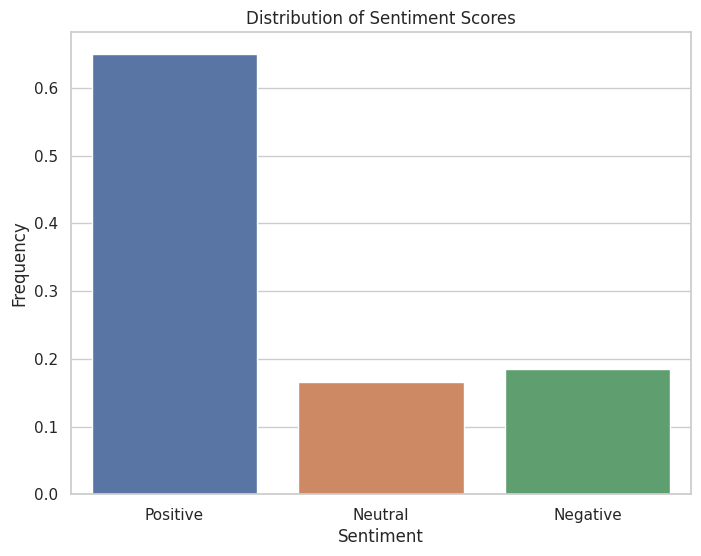

In [51]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(data=merged_df[['bert_pos', 'bert_neu', 'bert_neg']], ci=None)
plt.title('Distribution of Sentiment Scores')
plt.ylabel('Frequency')
plt.xlabel('Sentiment')
plt.xticks(ticks=[0, 1, 2], labels=['Positive', 'Neutral', 'Negative'])
plt.show()

Plot Results

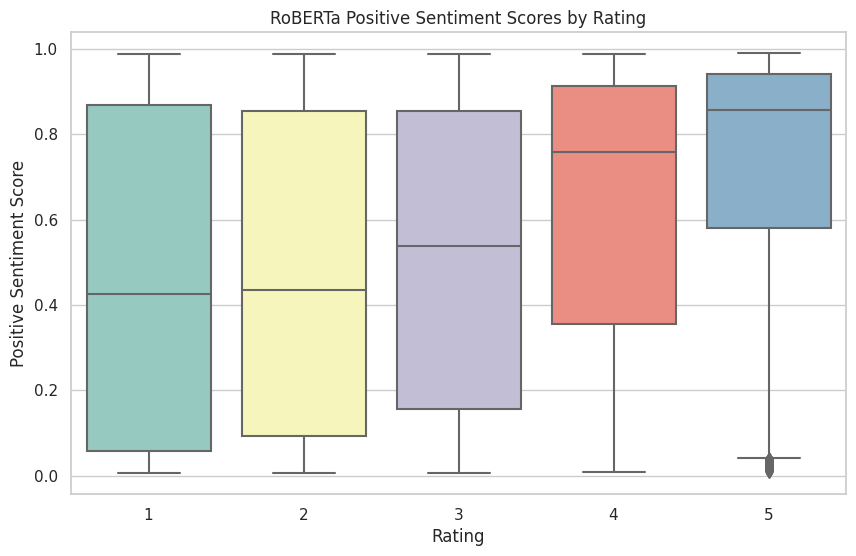

In [52]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='bert_pos', data=merged_df, palette="Set3")
plt.title('RoBERTa Positive Sentiment Scores by Rating')
plt.xlabel('Rating')
plt.ylabel('Positive Sentiment Score')

plt.show()

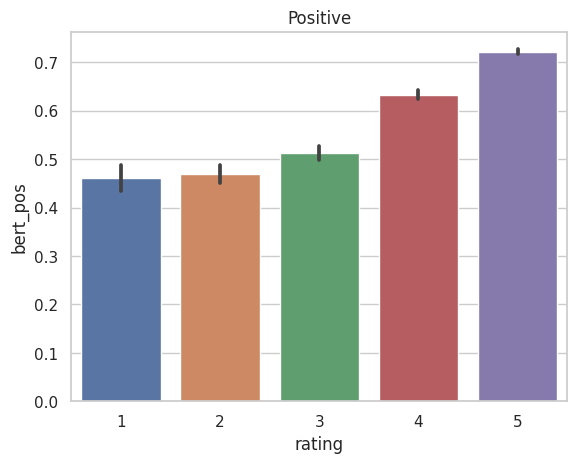

In [53]:
ax = sns.barplot(data=merged_df, x='rating', y='bert_pos')
ax.set_title('Positive')
plt.show()

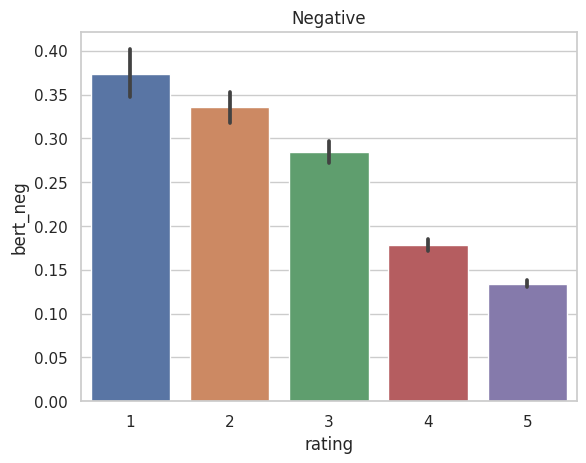

In [54]:
ax = sns.barplot(data=merged_df, x='rating', y='bert_neg')
ax.set_title('Negative')
plt.show()